#  Regression Task

📌 Task: Predict the number of bike rentals based on environmental and seasonal
factors.
<br>🎯 Target Variable: "count" (total number of rented bikes).

### Importing Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_reg_train = pd.read_csv("train.csv")

In [ ]:
df_reg_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df_reg_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = df_reg_train.drop(columns=["count", "datetime"]) # Dropped because datetime datatype not suitable with standatscaler
y = df_reg_train["count"]

In [ ]:
# Split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Importing model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [ ]:
X.shape

(10886, 10)

In [ ]:
# Build the model
model = Sequential([
    Input(shape=(10,)),  # Define input shape explicitly
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

### Training model

In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 64232.1133 - val_loss: 24871.2793
Epoch 2/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14918.0342 - val_loss: 3514.1877
Epoch 3/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2608.5364 - val_loss: 996.5534
Epoch 4/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 815.9875 - val_loss: 426.5430
Epoch 5/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 371.7139 - val_loss: 198.8906
Epoch 6/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 181.3654 - val_loss: 108.7998
Epoch 7/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 99.9306 - val_loss: 69.6731
Epoch 8/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 62.2269 - val_loss: 47.6633
Epoch 9/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 39.6269 - val_loss: 31.8525
Epoch 10/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 28.2789 - val_loss: 21.5353
Epoch 11/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.2294 - val_loss: 16.6398
Epoch 12/3

### Testing

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on test data: {mse}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3465
Mean Squared Error on test data: 1.259682536125183


In [ ]:
# Predict house prices
y_pred = model.predict(X_test)
print(f"Predicted prices: {y_pred[:5]}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted prices: [[126.90485 ]
 [ 14.606562]
 [162.87231 ]
 [232.31119 ]
 [221.42143 ]]


In [ ]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared on test data: {r2}")

R-squared on test data: 0.9999618530273438


# Classification Task

📌 Task: Predict whether a customer will subscribe to a term deposit based on
demographic and financial data.
<BR>🎯 Target Variable: "y" (Binary: "yes" or "no").

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [ ]:
y.head()

,y
0,no
1,no
2,no
3,no
4,no


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns

In [ ]:
X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"), SimpleImputer(strategy="most_frequent"))

In [ ]:
prepp = ColumnTransformer([
    ("num", num_pipeline, X.select_dtypes(include=[np.number]).columns),
    ("cat", cat_pipeline, X.select_dtypes(include=['object']).columns)
])

In [ ]:
x_train_processed = prepp.fit_transform(X_train_bank)
x_test_processed = prepp.transform(X_test_bank)

In [ ]:
x_train_processed.shape

(36168, 51)

In [ ]:
# Build the model
model = Sequential([
    Input(shape=(51,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Convert 'y' to numerical using Label Encoding or OneHot Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_bank_processed = encoder.fit_transform(y_train_bank)
y_test_bank_processed = encoder.transform(y_test_bank)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# Train the model
model.fit(x_train_processed, y_train_bank_processed, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8827 - loss: 0.2740 - val_accuracy: 0.9056 - val_loss: 0.2115
Epoch 2/5
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9057 - loss: 0.2077 - val_accuracy: 0.9030 - val_loss: 0.2075
Epoch 3/5
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9083 - loss: 0.2025 - val_accuracy: 0.9081 - val_loss: 0.2040
Epoch 4/5
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9098 - loss: 0.1969 - val_accuracy: 0.9030 - val_loss: 0.2035
Epoch 5/5
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9131 - loss: 0.1937 - val_accuracy: 0.9077 - val_loss: 0.2002


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


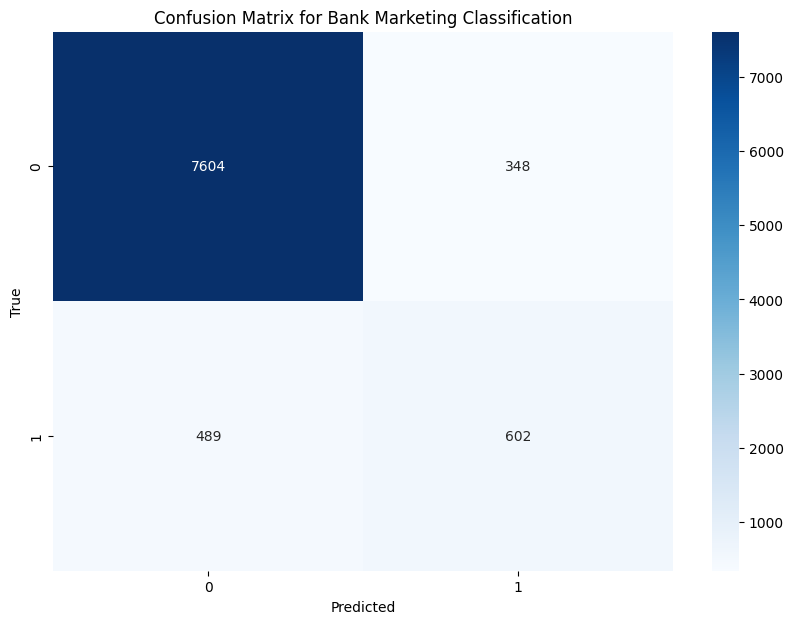

In [ ]:
# Predict on test data
y_pred = model.predict(x_test_processed)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

# Get the true class labels
y_true = y_test_bank_processed  # No need for argmax as it's already in class labels format

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn heatmap
import matplotlib.pyplot as plt  # Import matplotlib.pyplot
import seaborn as sns  # Import seaborn

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])  # Update labels to '0' and '1'
plt.title('Confusion Matrix for Bank Marketing Classification')  # Update title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Compute the F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.9046517886535288


In [ ]:
# Evaluating the model
from sklearn.metrics import accuracy_score # Import accuracy_score
accuracy = accuracy_score(y_test_bank_processed, y_pred_classes) # Use processed y_test
class_rep = classification_report(y_test_bank_processed, y_pred_classes) # Use processed y_test

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_rep}")

Accuracy: 0.9074422205020458
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7952
           1       0.63      0.55      0.59      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.75      0.77      9043
weighted avg       0.90      0.91      0.90      9043



#### Since dataset have fewer instances of class 1, the model biased toward predicting class 0.

# Trying to improve model

In [ ]:
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define the model
model = Sequential([
    Input(shape=(51,)),
    Dense(64, activation='relu'),
    Dropout(0.3),  # Helps prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with AUC metric
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])

# Class weights (to handle imbalance)
class_weights = {0: 1.0, 1: 3.0}  # Increase weight for minority class

# Train the model with class weights
model.fit(x_train_processed, y_train_bank_processed, epochs=20, batch_size=32, class_weight=class_weights, validation_data=(x_test_processed, y_test_bank_processed))


Epoch 1/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8266 - auc_1: 0.8034 - loss: 0.5814 - val_accuracy: 0.8602 - val_auc_1: 0.9107 - val_loss: 0.2850
Epoch 2/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8656 - auc_1: 0.9055 - loss: 0.4253 - val_accuracy: 0.8775 - val_auc_1: 0.9142 - val_loss: 0.2592
Epoch 3/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8714 - auc_1: 0.9139 - loss: 0.4074 - val_accuracy: 0.8706 - val_auc_1: 0.9185 - val_loss: 0.2610
Epoch 4/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8728 - auc_1: 0.9191 - loss: 0.3964 - val_accuracy: 0.8773 - val_auc_1: 0.9205 - val_loss: 0.2493
Epoch 5/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8741 - auc_1: 0.9218 - loss: 0.3882 - val_accuracy: 0.8791 - val_auc_1: 0.9207 - val_loss: 0.2480
Epoch 6/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8774 - auc_1: 0.9256 - loss: 0.3787 - val_accuracy: 0.8686 - val_auc_1: 0.9239 - val_loss: 0.2656
Epo

In [ ]:
# Predict on test data
y_pred = model.predict(x_test_processed)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
# Evaluating the model
from sklearn.metrics import accuracy_score # Import accuracy_score
accuracy = accuracy_score(y_test_bank_processed, y_pred_classes) # Use processed y_test
class_rep = classification_report(y_test_bank_processed, y_pred_classes) # Use processed y_test

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_rep}")

Accuracy: 0.8883114010837112
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      7952
           1       0.53      0.77      0.63      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.84      0.78      9043
weighted avg       0.91      0.89      0.90      9043



<br>New model results show:

<br>Accuracy: 88.83% (slightly lower than before)
<br>Precision & Recall Shift:

<br>Class 0 (Negative Class): Precision 97%, Recall 90% (Previously: 94%, 96%)
<br>Class 1 (Positive Class): Precision 53%, Recall 77% (Previously: 63%, 55%)

<br>Class 1 recall improved (55% → 77%), meaning the model is catching more positive cases.
<br>Class 1 precision dropped (63% → 53%), meaning there are more false positives.
<br>Class 0 recall dropped (96% → 90%), meaning the model misses some negative cases.

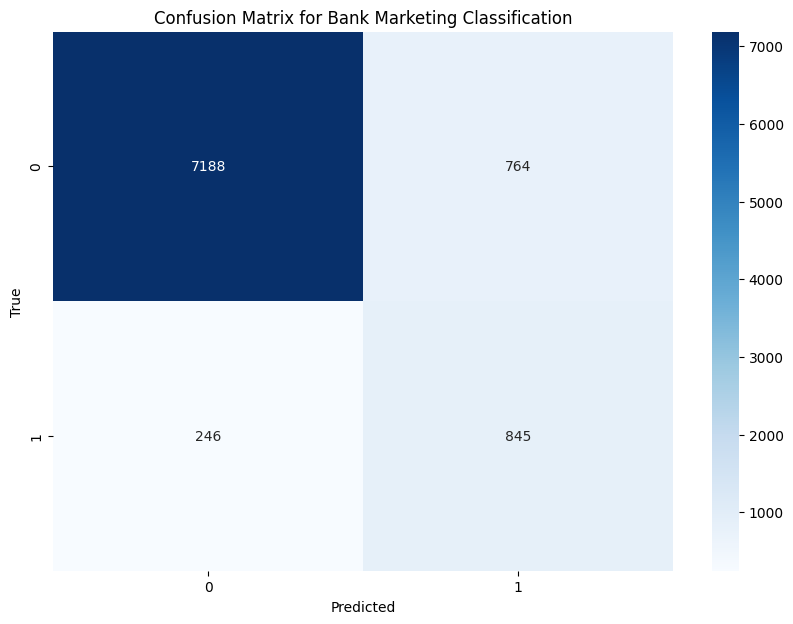

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn heatmap
import matplotlib.pyplot as plt  # Import matplotlib.pyplot
import seaborn as sns  # Import seaborn

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])  # Update labels to '0' and '1'
plt.title('Confusion Matrix for Bank Marketing Classification')  # Update title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()